# 1) Problem Overview

###        Heart Attack Prediction



The aim of the project is to estimate the heart attack risk of patients based on the given variables using different Machine Learning models 


# 2) Collecting of data

In this project, I used the "Logistic regression To predict heart disease" datasets 

Data set: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data

## Importing the required libraries


In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# %matplotlib inline

from collections import Counter

from sklearn.preprocessing import LabelEncoder  #preprocessing
from sklearn.preprocessing import MinMaxScaler  #normalization
from sklearn.model_selection import train_test_split    #splitting data

#from sklearn.model_selection import cross_val_score,KFold   #model selection


from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ensembling
#from mlxtend.classifier import StackingCVClassifier

## Loading data set


In [11]:
data = pd.read_csv("framingham.csv")
df = data.copy()

# Sütun adını değiştirelim
df = df.rename(columns={'male': 'gender', 'diabetes':'prevalentDiabetes','TenYearCHD':'Heart_attack_risk'})

# Kullanılmayan sütunları kaldır
kaldirmak_istedigimiz_sutunlar = ['education', 'totChol','sysBP','diaBP','glucose']
df = df.drop(columns=kaldirmak_istedigimiz_sutunlar)

# df.to_csv('dataset.csv', index=False) 

df.head()


,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,prevalentDiabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_attack_risk
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


- gender: 0:female, 1:male
- Heart_attack_risk: 0:there is no risk, 1: there is risk


# 3) Examination and visualization of data

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4238 non-null   int64  
 1   age                4238 non-null   int64  
 2   currentSmoker      4238 non-null   int64  
 3   cigsPerDay         4209 non-null   float64
 4   BPMeds             4185 non-null   float64
 5   prevalentStroke    4238 non-null   int64  
 6   prevalentHyp       4238 non-null   int64  
 7   prevalentDiabetes  4238 non-null   int64  
 8   BMI                4219 non-null   float64
 9   heartRate          4237 non-null   float64
 10  Heart_attack_risk  4238 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 364.3 KB


### Handling of NaN values

In [12]:
# NaN değerleri bulma
# nan_degerler = df.isna()
# print("NaN Değerler:")
# print(nan_degerler)

# # NaN değerlerin sayısını bulma
# nan_sayisi = df.isna().sum().sum()
# print(nan_sayisi)

# # NaN değerlerin bulunduğu sütunları bulma
nan_sutunlar = df.columns[df.isna().any()].tolist()
# print("NaN Değerlerin Bulunduğu Sütunlar:", nan_sutunlar)

# # NaN değerlerini sütunların ortalamasıyla doldurma
for sutun in nan_sutunlar:
    ort = df[sutun].mean()
    df[sutun].fillna(ort, inplace=True)

df.to_csv('data.csv', index=False) 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4238 non-null   int64  
 1   age                4238 non-null   int64  
 2   currentSmoker      4238 non-null   int64  
 3   cigsPerDay         4238 non-null   float64
 4   BPMeds             4238 non-null   float64
 5   prevalentStroke    4238 non-null   int64  
 6   prevalentHyp       4238 non-null   int64  
 7   prevalentDiabetes  4238 non-null   int64  
 8   BMI                4238 non-null   float64
 9   heartRate          4238 non-null   float64
 10  Heart_attack_risk  4238 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 364.3 KB


In [40]:
df.describe()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,prevalentDiabetes,BMI,heartRate,Heart_attack_risk
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,25.802008,75.878924,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,4.070953,12.025177,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,15.540000,44.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,23.080000,68.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,25.410000,75.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,28.037500,83.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,56.800000,143.000000,1.000000


In [8]:
df.shape

(4238, 11)

In [9]:
df.size

46618

In [10]:
df.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,prevalentDiabetes,BMI,heartRate,Heart_attack_risk
0,1,39,0,0.0,0.0,0,0,0,26.97,80.0,0
1,0,46,0,0.0,0.0,0,0,0,28.73,95.0,0
2,1,48,1,20.0,0.0,0,0,0,25.34,75.0,0
3,0,61,1,30.0,0.0,0,1,0,28.58,65.0,1
4,0,46,1,23.0,0.0,0,0,0,23.10,85.0,0


## Visualize the data

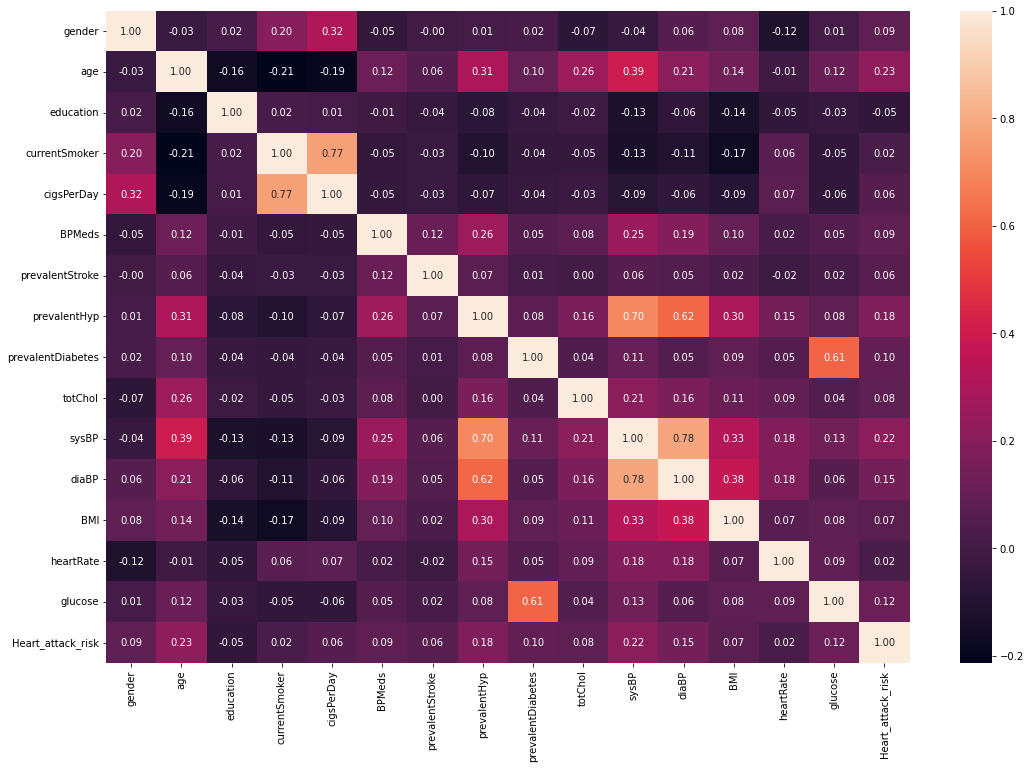

In [13]:
# Correlation of the variables
corr = df.corr()
fig, ax = plt.subplots(figsize = (18,12))
ax = sns.heatmap(corr, annot = True , fmt ='.2f')

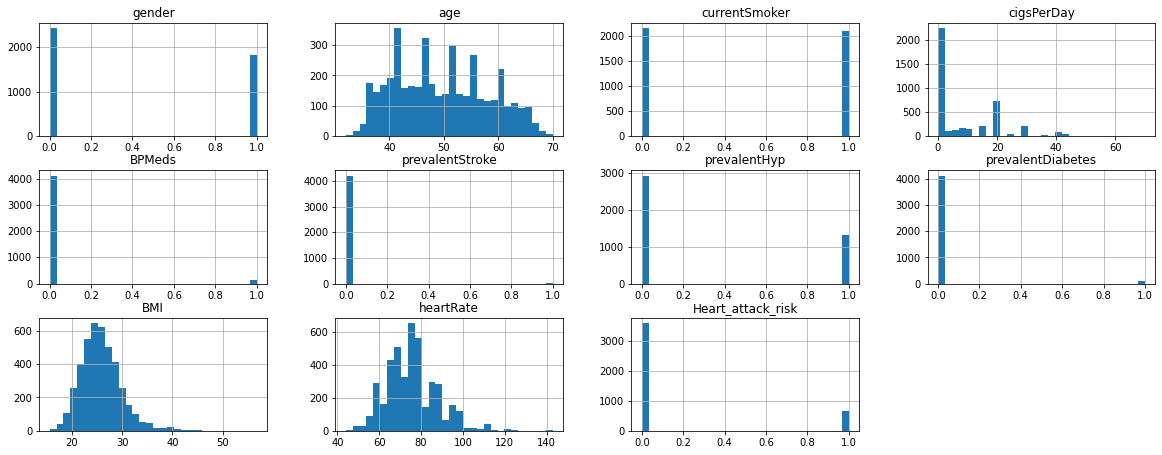

In [5]:
#get familiar with the dataset 
df.hist(bins=30, 
        figsize=(20,40),
        layout=(15,4));

C:\Users\Merve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Merve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Merve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:

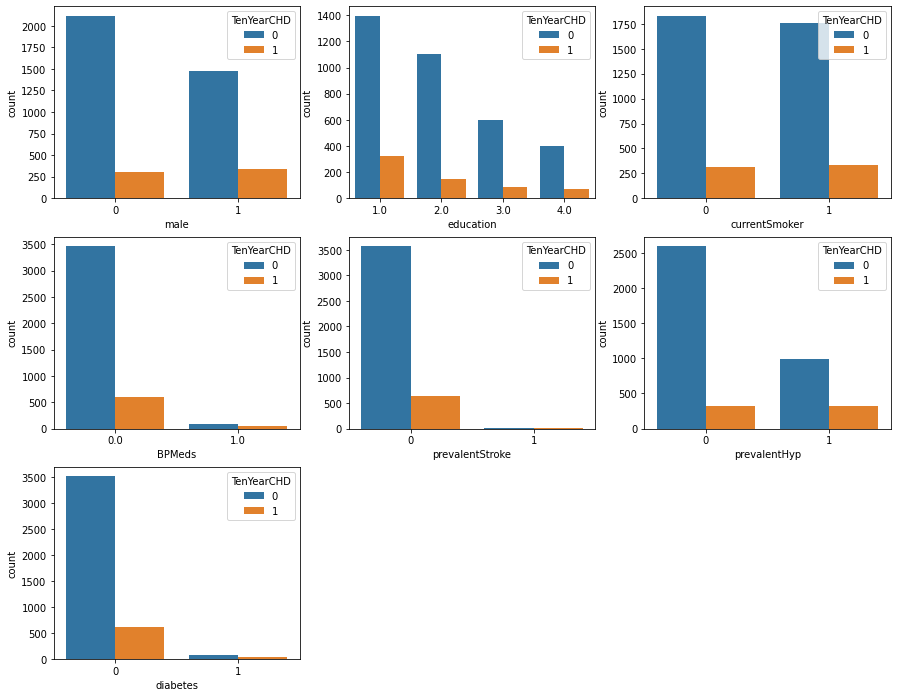

In [6]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.countplot('male',hue='TenYearCHD',data=data)
plt.subplot(3,3,2)
sns.countplot('education',hue='TenYearCHD',data=data)
plt.subplot(3,3,3)
sns.countplot('currentSmoker',hue='TenYearCHD',data=data)
plt.subplot(3,3,4)
sns.countplot('BPMeds',hue='TenYearCHD',data=data)
plt.subplot(3,3,5)
sns.countplot('prevalentStroke',hue='TenYearCHD',data=data)
plt.subplot(3,3,6)
sns.countplot('prevalentHyp',hue='TenYearCHD',data=data)
plt.subplot(3,3,7)
sns.countplot('diabetes',hue='TenYearCHD',data=data)

plt.show()

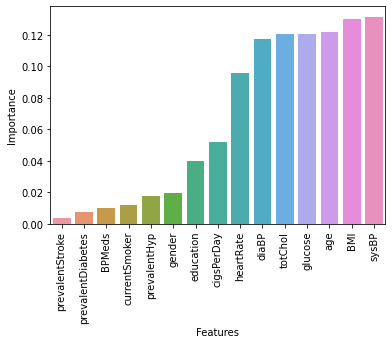

In [14]:
rf = RandomForestClassifier()
rf.fit( df.iloc[:,:-1], df.iloc[:,-1] )
importance=rf.feature_importances_
df3=pd.DataFrame({"Features":df.iloc[:,:-1].columns,"Importance":importance})
sns.barplot(x="Features",y="Importance",data=df3,order=df3.sort_values("Importance")['Features'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.pairplot(df)

# 4) Fitting Data to Machine Learning Models
## Data Preprocessing


In [41]:
df_sagliksiz = df.loc[df['Heart_attack_risk'] == 1]
df_saglikli = df.loc[df['Heart_attack_risk'] == 0]
#print('sagliksizlar\n',df_sagliksiz)
#print('\n saglikli\n',df_saglikli)

#print("df_saglikli Satır Sayısı:", df_saglikli.shape[0])
#print("df_sagliksiz Satır Sayısı:", df_sagliksiz.shape[0])

# 'df_saglikli' DataFrame'inden rasgele 1500 satır seç
new_df_saglikli_0 = df_saglikli.sample(n=700, random_state=42)

# 'df_sagliksiz' DataFrame'inden rasgele 600 satır seç
new_df_sagliksiz_1 = df_sagliksiz.sample(n=600, random_state=42)




# 'new_df_saglikli' ve ' new_df_sagliksiz' dataframelerini birleştir
merged_df = pd.concat([new_df_sagliksiz_1, new_df_saglikli_0], ignore_index=True)

# merged_df DataFrame'ini karışık bir şekilde sırala
merged_df = merged_df.sample(frac=1, random_state=42, ignore_index=True)

#print(merged_df.shape[0])

new_df = merged_df.copy()
print(new_df.head(10))



   gender  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       0   47              1        20.0     0.0                0   
1       1   54              1        20.0     0.0                0   
2       0   60              0         0.0     0.0                0   
3       0   61              1         1.0     0.0                0   
4       1   49              0         0.0     0.0                0   
5       1   35              1        40.0     0.0                0   
6       1   58              1         9.0     0.0                0   
7       1   46              1        30.0     0.0                0   
8       0   50              0         0.0     0.0                0   
9       0   41              1        30.0     0.0                0   

   prevalentHyp  prevalentDiabetes    BMI  heartRate  Heart_attack_risk  
0             0                  0  20.88       85.0                  1  
1             1                  0  24.71       96.0                  0  
2      

In [42]:
new_df.describe()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,prevalentDiabetes,BMI,heartRate,Heart_attack_risk
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.483077,51.250000,0.504615,9.747711,0.041248,0.009231,0.375385,0.036154,26.190477,76.185291,0.461538
std,0.499906,8.594704,0.500171,12.556974,0.197768,0.095669,0.484408,0.186745,4.267697,11.971881,0.498710
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.960000,48.000000,0.000000
25%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.247500,68.000000,0.000000
50%,0.000000,51.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.802008,75.000000,0.000000
75%,1.000000,58.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,28.570000,84.000000,1.000000
max,1.000000,70.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,56.800000,122.000000,1.000000


### Dealing With Categorical Attributes 
- There is not categorical attributes in this dataset

### Features and Labels

In [43]:
y = new_df.Heart_attack_risk
X = new_df.drop(["Heart_attack_risk"], axis =1).astype("float64")

### Feature Scaling

In [44]:
#normalization
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.        , 0.39473684, 1.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.12047013, 0.5       ],
       [1.        , 0.57894737, 1.        , 0.33333333, 0.        ,
        0.        , 1.        , 0.        , 0.21425073, 0.64864865],
       [0.        , 0.73684211, 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.30778648, 0.63513514],
       [0.        , 0.76315789, 1.        , 0.01666667, 0.        ,
        0.        , 1.        , 0.        , 0.55093046, 0.12162162],
       [1.        , 0.44736842, 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.38467189, 0.2972973 ]])

### Split the data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

- Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem????????????????????????? SMOTE?
644 deen 300 tanesini, 3594 un de yarısını rasgele gelen veri setini sonra ayır, f1 skoru 0 ve 1 de yuzde 85 i gecsin

In [46]:
print(y_test.unique())
Counter(y_train)


[1 0]


Counter({1: 435, 0: 540})

# 5) Creating and training models


 I take different machine learning algorithm and try to find algorithm which predict accurately.

- Logistic Regression
- Naive Bayes
- Random Forest Classifier
- Extreme Gradient Boost
- K-Nearest Neighbour
- Decision Tree
- Support Vector Machine


## Create models

In [19]:
log_reg = LogisticRegression()  #Logistic Regression
naive_bayes = GaussianNB()      #Naive Bayes
rand_forest = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)  #Random Forest Classifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5) #Extreme Gradient Boost
knn = KNeighborsClassifier(n_neighbors=9) #K-Neighbors Classifier
dec_tree = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)   #Decision Tree Classifier
svm = SVC(C=2, kernel='rbf')   #Support Vector Machine



## Train models

In [20]:
log_reg_model = log_reg.fit(X_train,y_train)
naive_bayes_model = naive_bayes.fit(X_train,y_train)
rand_forest_model = rand_forest.fit(X_train,y_train)
xgb_model = xgb.fit(X_train,y_train)
knn_model = knn.fit(X_train, y_train)
dec_tree_model = dec_tree.fit(X_train, y_train)
svm_model = svm.fit(X_train, y_train)

## Predict

In [21]:
log_reg_predict = log_reg.predict(X_test)
naive_bayes_predict = naive_bayes.predict(X_test)
rand_forest_predict = rand_forest.predict(X_test)
xgb_predict =xgb.predict(X_test)
knn_predict= knn.predict(X_test)
dec_tree_predict = dec_tree.predict(X_test)
svm_predict = svm.predict(X_test)


# 6) Choosing a model

## Comparing the model performances

### Confusion matrixes of models

Confussion matrix of Logistic Regression:


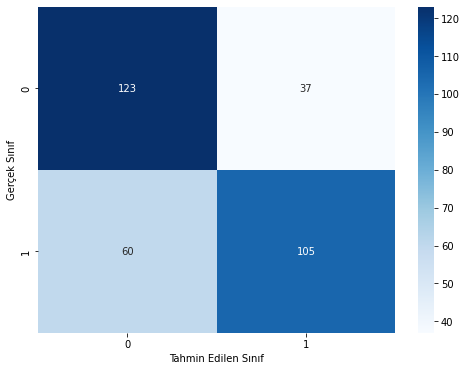

In [22]:
print("Confussion matrix of Logistic Regression:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, log_reg_predict), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

Confussion matrix of Naive Bayes:


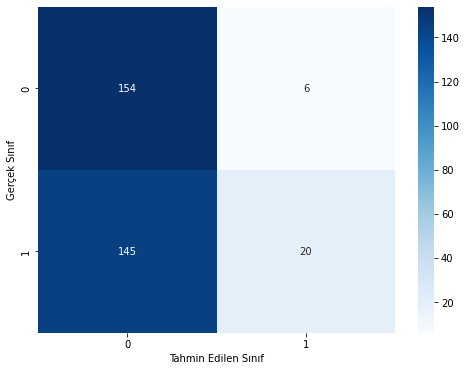

In [23]:
print("Confussion matrix of Naive Bayes:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, naive_bayes_predict), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

Confussion matrix of Random Forest Classifier:


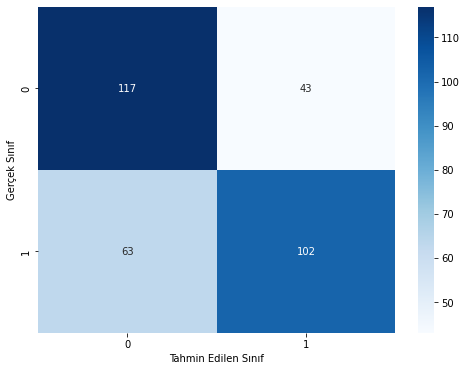

In [24]:
print("Confussion matrix of Random Forest Classifier:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rand_forest_predict), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

Confussion matrix of Extreme Gradient Boost:


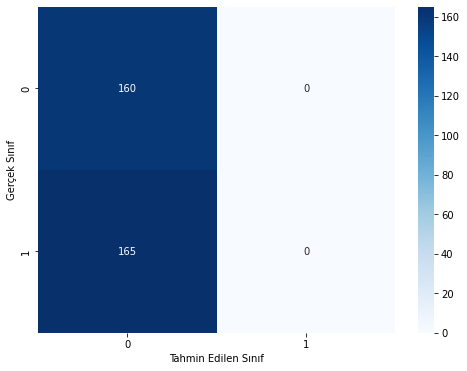

In [25]:
print("Confussion matrix of Extreme Gradient Boost:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, xgb_predict), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

Confussion matrix of K-Neighbors Classifier:


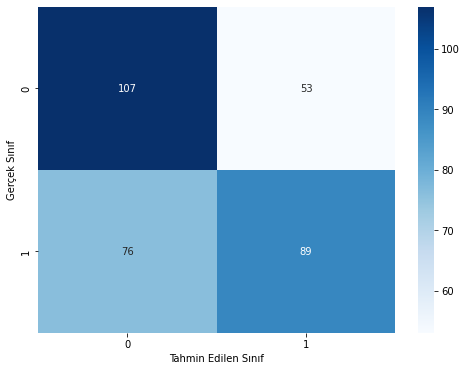

In [26]:
print("Confussion matrix of K-Neighbors Classifier:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_predict), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

Confussion matrix of Decision Tree Classifier:


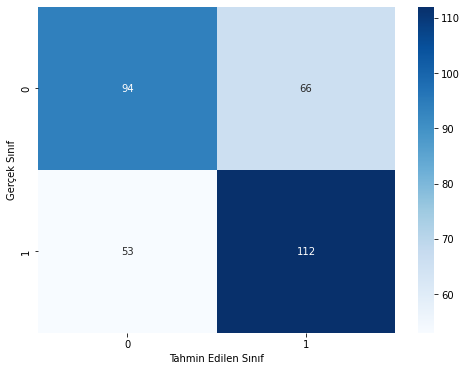

In [27]:
print("Confussion matrix of Decision Tree Classifier:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dec_tree_predict), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

Confussion matrix of Support Vector Classifier:


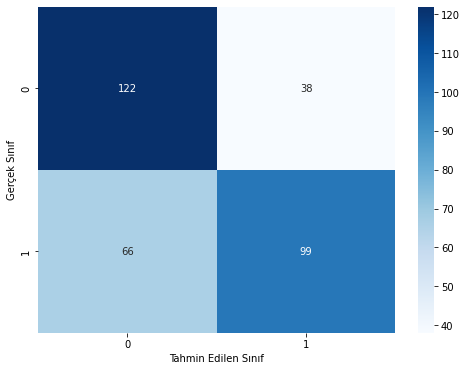

In [28]:
print("Confussion matrix of Support Vector Classifier:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predict), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

### Accuracy scores of models

In [29]:
print("Accuracy of Logistic Regression:", accuracy_score(y_test, log_reg_predict))
print("Accuracy of Naive Bayes:", accuracy_score(y_test, naive_bayes_predict))
print("Accuracy of Random Forest Classifier:", accuracy_score(y_test, rand_forest_predict))
print("Accuracy of Extreme Gradient Boost:", accuracy_score(y_test, xgb_predict))
print("Accuracy of K-Neighbors Classifier:", accuracy_score(y_test, knn_predict))
print("Accuracy of Decision Tree Classifier:", accuracy_score(y_test, dec_tree_predict))
print("Accuracy of Support Vector Classifier:", accuracy_score(y_test, svm_predict))

Accuracy of Logistic Regression: 0.7015384615384616
Accuracy of Naive Bayes: 0.5353846153846153
Accuracy of Random Forest Classifier: 0.6738461538461539
Accuracy of Extreme Gradient Boost: 0.49230769230769234
Accuracy of K-Neighbors Classifier: 0.6030769230769231
Accuracy of Decision Tree Classifier: 0.6338461538461538
Accuracy of Support Vector Classifier: 0.68


### Classification reports of models

- Instead of calculating precision, recall, f-1 score and accuracy separately we can create a report to compare the performances.

In [30]:
print("Classification report of Logistic Regression:\n", classification_report(y_test, log_reg_predict) )
print("Classification report of Naive Bayes:\n", classification_report(y_test, naive_bayes_predict) )
print("Classification report of Random Forest Classifier:\n", classification_report(y_test, rand_forest_predict) )

Classification report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       160
           1       0.74      0.64      0.68       165

    accuracy                           0.70       325
   macro avg       0.71      0.70      0.70       325
weighted avg       0.71      0.70      0.70       325

Classification report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.52      0.96      0.67       160
           1       0.77      0.12      0.21       165

    accuracy                           0.54       325
   macro avg       0.64      0.54      0.44       325
weighted avg       0.64      0.54      0.44       325

Classification report of Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69       160
           1       0.70      0.62      0.66       165

    accuracy                           0.67 

In [31]:
print("Classification report of Extreme Gradient Boost:\n", classification_report(y_test, xgb_predict) )
print("Classification report of K-Neighbors Classifier:\n", classification_report(y_test, knn_predict) )

Classification report of Extreme Gradient Boost:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       160
           1       0.00      0.00      0.00       165

    accuracy                           0.49       325
   macro avg       0.25      0.50      0.33       325
weighted avg       0.24      0.49      0.32       325

Classification report of K-Neighbors Classifier:
               precision    recall  f1-score   support

           0       0.58      0.67      0.62       160
           1       0.63      0.54      0.58       165

    accuracy                           0.60       325
   macro avg       0.61      0.60      0.60       325
weighted avg       0.61      0.60      0.60       325



C:\Users\Merve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Merve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Merve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327

In [32]:
print("Classification report of Decision Tree Classifier:\n", classification_report(y_test, dec_tree_predict) )
print("Classification report of Support Vector Classifier:\n", classification_report(y_test, svm_predict) )

Classification report of Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.64      0.59      0.61       160
           1       0.63      0.68      0.65       165

    accuracy                           0.63       325
   macro avg       0.63      0.63      0.63       325
weighted avg       0.63      0.63      0.63       325

Classification report of Support Vector Classifier:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       160
           1       0.72      0.60      0.66       165

    accuracy                           0.68       325
   macro avg       0.69      0.68      0.68       325
weighted avg       0.69      0.68      0.68       325



### ROC Curve

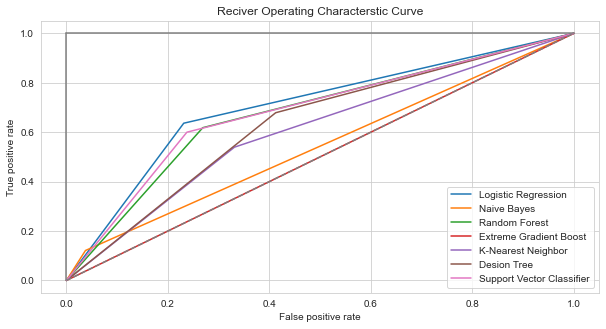

In [33]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,log_reg_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,naive_bayes_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rand_forest_predict)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dec_tree_predict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svm_predict)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# 7) Evaluation

- It was very important that FN and FP values were low in our model. For this reason, Logistic regression model was chosen